### Student Information
Name:羅子宸

Student ID:111034013

GitHub ID:DuoTaiChen

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [205]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

In [206]:
df_raw = pd.read_csv('newdataset\Reddit-stock-sentiment.csv')
df_raw.shape

(847, 16)

## Print some data

In [207]:
for i in range(3):
    print(f"Post {i+1}:")
    print(df_raw['datetime'][i])
    print(df_raw['title'][i])
    print(df_raw['text'][i])
    print()

Post 1:
2025-04-11 17:29:56
Retardation is on the menu boys! WSB is so back
Calls on retards

Post 2:
2025-04-12 1:12:19
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

Post 3:
2025-04-10 15:09:41
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Seeing lots of red in the ticker.



## Querying some post over 100 upvotes

In [208]:
df_raw[df_raw['upvotes']>100].head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
42,comment,2021-02-01 13:45:17,gllicpw,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,3943,NaN,NaN,So they went from saying redditors are bad for...,0.666667,-0.700000,-1.0,"['market', 'silver']",1.0
93,comment,2025-04-10 14:58:22,mmecl9h,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,dancness,https://www.reddit.com/r/stocks/comments/1jvzr...,294,NaN,NaN,1. Make middle class homeless by causing hype...,0.340000,-0.100000,-1.0,"['hyperinflation', 'homeless', 'labor', 'Make'...",-1.0
164,comment,2025-04-11 13:58:46,mmkbdyy,StockMarket,The Trump administration is begging Xi Jinping...,SingularityCentral,https://edition.cnn.com/2025/04/10/politics/tr...,125,NaN,NaN,The bond market is also begging for that call....,0.600000,-0.400000,-1.0,"['Thing', 'P', 'bond', '..', 'call', 'S&P', 'm...",0.0
324,comment,2025-04-11 8:36:53,mmj56kp,stocks,BREAKING: China raises tariffs on U.S. goods t...,Dependent-Hurry9808,https://www.reddit.com/r/stocks/comments/1jwku...,338,NaN,NaN,They’re going to start selling our treasury bonds,0.000000,0.000000,0.0,['treasury'],0.0
497,post,2025-04-11 2:58:02,1jwfydk,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Fidler_2K,https://www.reddit.com/r/stocks/comments/1jwfy...,1105,11.0,0.99,\r\n\r\n> The 10-year Treasury yield climbed 6...,0.602273,0.005682,1.0,"['Treasurys', 'Trump', 'someone', 'issue', 'ba...",0.0


## Query post from same subreddit

In [209]:
df_raw['subreddit'].unique()

array(['wallstreetbets', 'StockMarket', 'stockstobuytoday', 'stocks'],
      dtype=object)

same way as ex3

In [210]:
df_raw[df_raw['subreddit']=='wallstreetbets'][::10][:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.0,-0.900,-1.0,[],-1.0
40,comment,2025-04-11 22:00:36,mmmyq7m,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,InstructionNo4546,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,These China AI factory memes are pretty good. ...,0.8,0.475,1.0,"['factory', 'time', 'AI', 'China AI', 'China',...",0.0
96,comment,2025-04-12 2:05:07,mmo2f48,wallstreetbets,Someone post the hotline please.,Rosie3435,https://i.redd.it/tcfuu97p7bue1.jpeg,1,NaN,NaN,200k loss in a month.. haha,0.3,0.200,1.0,"['..', 'month', 'loss', 'haha']",-1.0
183,comment,2025-04-11 22:45:45,mmn6eil,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,NonsensicalWorries,https://www.reddit.com/r/wallstreetbets/commen...,13,NaN,NaN,My resume isn't even read by companies anymore...,0.0,0.000,0.0,['resume'],-1.0
227,comment,2025-04-11 20:25:56,mmmh2t3,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,VisualMod,https://www.reddit.com/r/wallstreetbets/commen...,9,NaN,NaN,#Ban Bet Lost\r\n\r\n/u/Local-Wall-4359 made a...,0.4,0.800,1.0,"['Ban', 'Lost', '/u/Local-Wall-4359', 'WSB', '...",0.0


## Check Mising Values

In [211]:
print(df_raw.isnull().sum())

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64


In [212]:
df_filled = df_raw.copy()
# Fill downvotes NaNs with 0
df_filled['downvotes'] = df_filled['downvotes'].fillna(0)
# Fill upvote_ratio NaNs with 1 if upvotes is greater than 0, else fill with 0
df_filled.loc[(df_filled['upvote_ratio'].isna()) & (df_filled['upvotes']>0), 'upvote_ratio'] = 1
df_filled.loc[(df_filled['upvote_ratio'].isna()) & (df_filled['upvotes']<=0), 'upvote_ratio'] = 0
print(df_filled.isnull().sum())

type            0
datetime        0
post_id         0
subreddit       0
title           0
author          0
url             0
upvotes         0
downvotes       0
upvote_ratio    0
text            0
subjectivity    0
polarity        0
sentiment       0
entities        0
label           0
dtype: int64


## Sampling

In [213]:
df_filled.shape

(847, 16)

In [214]:
df_sampled = df_filled.sample(n=100)
df_sampled.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
439,post,2025-04-06 2:00:53,1jsjijw,stockstobuytoday,"Upcoming Initial Public Offering (IPO), Specia...",AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,&#x200B;\r\n\r\n[]()\r\n\r\n&#x200B;\r\n\r\nNe...,0.454545,0.136364,1.0,"['Performance', ']', 'IPOS', 'x200B', 'New', '...",0.0
747,comment,2025-04-10 14:31:58,mme783u,StockMarket,How do you feel about a sitting president maki...,Cadiz1664,https://apnews.com/article/trump-truth-social-...,1,0.0,1.0,Ask our SC how they feel about it: “Way to go ...,0.000000,0.000000,0.0,"['SC', 'Don', 'Way', 'Ask', '”']",1.0
283,comment,2025-04-10 16:37:51,mmewq0h,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,Alexwonder999,https://www.reddit.com/r/stocks/comments/1jvzr...,1,0.0,1.0,Hes mad because J Powell doesn't play games. P...,0.700000,-0.512500,-1.0,"['ass', 'sycophant', 'Hes', 'mad', 'level', 'P...",0.0
83,comment,2025-04-11 11:08:07,mmjknn3,StockMarket,🚨China responds to Trump’s 145% tariff with an...,Desperate-Awareness4,https://i.redd.it/2f7y4h6226ue1.jpeg,19,0.0,1.0,"His plan is ""fuck you, be less poor""",0.422222,-0.322222,-1.0,['plan'],-1.0
427,comment,2025-04-11 8:28:42,mmj4fre,StockMarket,Data Shows US Allies—Not China—Dumping Treasuries,flint-hills-sooner,https://i.redd.it/31r650bss4ue1.jpeg,0,0.0,0.0,"Bro don’t try, to quote tropic thunder. He wen...",0.775000,-0.275000,-1.0,"['Bro', 'try', 'thunder', 't', 'retard', '’', ...",-1.0


<Axes: xlabel='subreddit'>

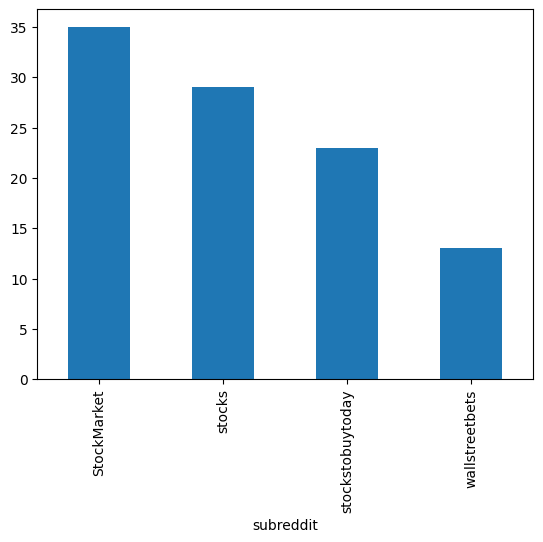

In [215]:
df_sampled.subreddit.value_counts().plot(kind='bar')

<Axes: title={'center': 'Category distribution'}, xlabel='subreddit'>

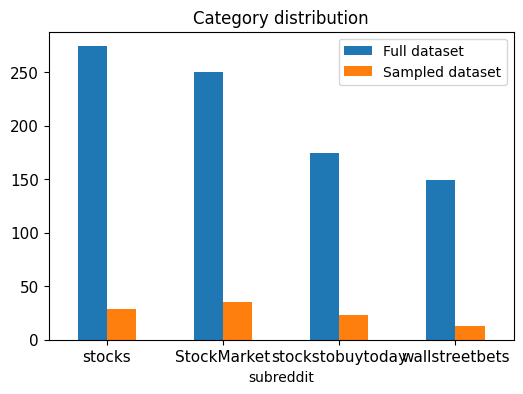

In [216]:
df = pd.DataFrame({
    'Full dataset': df_filled.subreddit.value_counts(),
    'Sampled dataset': df_sampled.subreddit.value_counts()
}, index=df_filled.subreddit.value_counts().index)
df.plot(kind='bar', title='Category distribution', rot=0, fontsize=11, figsize=(6,4))

## Feature creation

In [217]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_filled['text'])
X_counts.shape

(847, 4346)

In [218]:
analyze = count_vect.build_analyzer()
analyze(df_filled.text[0])

['calls', 'on', 'retards']

### Find a special term

In [219]:
X_counts[13, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [220]:
count_vect.get_feature_names_out()[X_counts[13].toarray()[0][:100].nonzero()]

array(['10', '15', '25'], dtype=object)

## Data Visualization

In [221]:
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

### Plot First 300 term frequency

In [222]:
fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
             y=term_frequencies[:300],
             labels={'x':'Terms', 'y':'Frequencies'},
             title='Term Frequencies for first 300 terms')
fig.show()

### Plot the term whose frequency over 100

In [223]:
df_freq = pd.DataFrame({
    'term': count_vect.get_feature_names_out(),
    'frequency': term_frequencies
})

fig = px.bar(df_freq[df_freq['frequency']>100], x='term', y='frequency',
                title='Term Frequencies',
                height=800)
fig.show()

### Plot the first 200 term sorted by frequency

In [224]:
fig = px.bar(df_freq.sort_values(by='frequency', ascending=False)[:200],
                x='term', y='frequency',
                title='Term Frequencies (sorted)',
                height=800)
fig.show()

### Plot the log of the term frequency

In [225]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [226]:
df_freq['frequency_log'] = term_frequencies_log
fig = px.bar(df_freq[:300],
                x='term', y='frequency_log',
                title='Log Term Frequencies',
                height=800)
fig.show()

### Plot the most frequent terms vary in different subreddit

In [227]:
df_filled['subreddit'].unique()

array(['wallstreetbets', 'StockMarket', 'stockstobuytoday', 'stocks'],
      dtype=object)

In [233]:
terms = np.array(count_vect.get_feature_names_out())

# for each subreddit:
for subreddit in df_filled['subreddit'].unique():
    # turn your boolean mask into numpy array of indices
    idx = (df_filled['subreddit'] == subreddit).values  
    
    # select rows from sparse matrix properly
    X_subr = X_counts[idx, :]   # now a valid sparse matrix
    
    # compute term frequencies for this subreddit
    term_freq = np.asarray(X_subr.sum(axis=0)).flatten()
    
    top_idx = term_freq.argsort()[::-1][:5]
    
    top_terms = terms[top_idx]
    top_freqs = term_freq[top_idx]
    
    fig = px.bar(x=top_terms, y=top_freqs, title=f"Top 5 terms in {subreddit}")
    fig.update_layout(xaxis_title="Term", yaxis_title="Frequency")
    fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here